# Some Useful Keras Utils
## == Get a specific layer from model ==
* Plot model architecture
```python
from keras.utils import plot_model
plot_model(model)
```

* Print layer information in detail:

```python
for i in range(4):
    print(model.layers[i])
    print(model.layers[i].input)
    print(model.layers[i].output, '\n')
```

* Get specific layer by index

```python
x = model.layers[2].output
x = Conv2D(16, 3)(x)
x = Flatten()(x)
x = Dense(128)(x)
prediction = Dense(3)(x)
model2 = Model(model.input, prediction)
model2.summary()
```

* Get specific layer by name

```python
# x = model.get_layer('conv1_conv').output
x = model.get_layer('pool1_pool').output
x = Conv2D(16, 3)(x)
x = Flatten()(x)
x = Dense(128)(x)
prediction = Dense(3)(x)
model3 = Model(model.input, prediction)
model3.summary()
```

## == GPU & System Info ==
* GPU count and name

```python
!nvidia-smi -L
```

* GPU detail info

```python
!nvidia-smi
```

* System detail info

```python
!lscpu
```

In [1]:
# Plot model architecture
import keras
model = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_shape=(200, 200, 3), classes=1000)

Using TensorFlow backend.
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lenotsai/Desktop/0912_機器深度學習/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

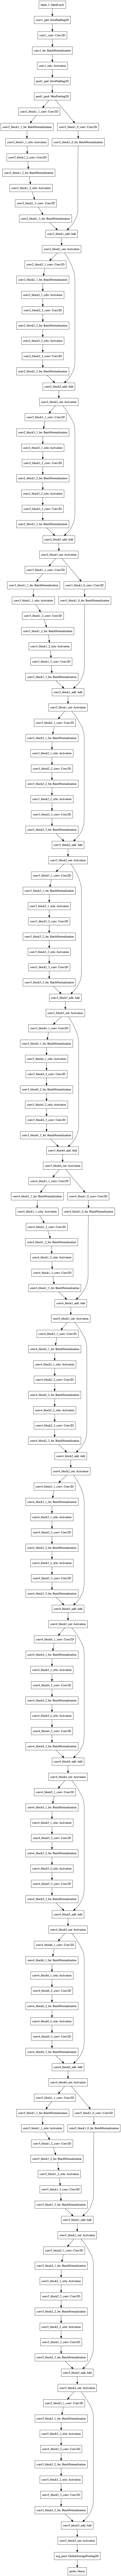

In [2]:
from keras.utils import plot_model
plot_model(model)

In [3]:
from keras.models import Model
from keras.layers import Dense, Flatten, Conv2D

In [4]:
for i in range(4):
    print(model.layers[i])
    print(model.layers[i].input)
    print(model.layers[i].output, '\n')
    

Tensor("input_1:0", shape=(?, 200, 200, 3), dtype=float32)
Tensor("input_1:0", shape=(?, 200, 200, 3), dtype=float32) 

Tensor("input_1:0", shape=(?, 200, 200, 3), dtype=float32)
Tensor("conv1_pad/Pad:0", shape=(?, 206, 206, 3), dtype=float32) 

Tensor("conv1_pad/Pad:0", shape=(?, 206, 206, 3), dtype=float32)
Tensor("conv1_conv/BiasAdd:0", shape=(?, 100, 100, 64), dtype=float32) 

Tensor("conv1_conv/BiasAdd:0", shape=(?, 100, 100, 64), dtype=float32)
Tensor("conv1_bn/cond/Merge:0", shape=(?, 100, 100, 64), dtype=float32) 



In [5]:
# Get specific layer by index
x = model.layers[2].output
x = Conv2D(16, 3)(x)
x = Flatten()(x)
x = Dense(128)(x)
prediction = Dense(3)(x)
model2 = Model(model.input, prediction)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 206, 206, 3)       0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 100, 100, 64)      9472      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 16)        9232      
_________________________________________________________________
flatten_1 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               19669120  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387 

In [6]:
# Get specific layer by name
# x = model.get_layer('conv1_conv').output
x = model.get_layer('pool1_pool').output
x = Conv2D(16, 3)(x)
x = Flatten()(x)
x = Dense(128)(x)
prediction = Dense(3)(x)
model3 = Model(model.input, prediction)
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 206, 206, 3)       0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 100, 100, 64)      9472      
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 64)      256       
_________________________________________________________________
conv1_relu (Activation)      (None, 100, 100, 64)      0         
_________________________________________________________________
pool1_pad (ZeroPadding2D)    (None, 102, 102, 64)      0         
_________________________________________________________________
pool1_pool (MaxPooling2D)    (None, 50, 50, 64)        0   

In [7]:
#GPU count and name
!nvidia-smi -L

/bin/sh: nvidia-smi: command not found


In [8]:
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [9]:
!lscpu

/bin/sh: lscpu: command not found
